# Anomaly Detection

# Mary Donovan Martello

## Part 8:  K Means Clusters as the Classification Labels in a Supervised Model

In [2]:
# Importing required libraries
library(dplyr)
library(caret)
library(ggplot2)
library(caTools)
library(ROSE)
library(smotefamily)
library(rpart)
library(rpart.plot)
library(psych)
library(ltm)
library(corrplot)
library(e1071)
library(data.table)
library(factoextra)
library(NbClust)
library(rminer)
library(MLmetrics)


suppressMessages(library(dplyr))
suppressMessages(library(caTools))
suppressMessages(library(ROSE))
suppressMessages(library(smotefamily))
suppressMessages(library(rpart.plot))
suppressMessages(library(psych))
suppressMessages(library(ltm))
suppressMessages(library(corrplot))
suppressMessages(library(e1071))
suppressMessages(library(data.table))
suppressMessages(library(factoextra))
suppressMessages(library(NbClust))
suppressMessages(library(rminer))
suppressMessages(library(MLmetrics))

In [3]:
#Loading the dataset
dfAll <- read.csv('creditFraud20.csv')

### Create Subset of Features from Feature Selection

In [4]:
dfSub <- dfAll[, c(5:5, 11:11, 13:13, 15:15, 18:18, 31:31)]
head(dfSub, 2)

V4,V10,V12,V14,V17,Class
-2.3710149,-0.3395744,-0.8130265,-1.1791100,0.5734176,0
-0.7282708,-1.0898177,0.9220560,-0.2163698,-0.1641099,0


### Data Preparation

**Change the Class values from 0 and 1 to 2 and 1 to match the clustering values.**

**> Full Dataset**

In [5]:
# replicate data
dfClust <- dfAll
# replace the values
dfClust[dfClust == 1] <- 1
dfClust[dfClust == 0] <- 2

**> Selected Subset**

In [6]:
# replicate data
dfClustSub <- dfSub
# replace the values
dfClustSub[dfClustSub == 1] <- 1
dfClustSub[dfClustSub == 0] <- 2

### Drop Non-Normal Distribution Features

In [7]:
df <- dfClust[, c(3:24, 26:31)]
head(df, 2)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,-0.3395744,-0.05770153,...,0.1487577,0.674059981,-0.8824945,-0.26334793,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,2
-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,-1.0898177,-0.38001273,...,-0.1039912,-0.008405836,0.2422148,-0.03969362,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,2


In [8]:
dim(df)

[1] 56961    28

**Split the Data into Training and Testing Sets**

**> Full Normal Dataset**

In [9]:
# set.seed(102) 
sample = sample.split(df$Amount, SplitRatio = .80)
Train = subset(df, sample == TRUE)
Test  = subset(df, sample == FALSE)


In [10]:
# # drop the target variable
XTrain <- Train[, c(1:27)]
yTrain <- subset(Train, select=c("Class"))

XTest <- Test[, c(1:27)]
yTest <- subset(Test, select=c("Class"))

**> Select Subset**

In [11]:
# set.seed(103) 
sample2 = sample.split(dfClustSub$V4, SplitRatio = .80)
TrainSub = subset(dfClustSub, sample2 == TRUE)
TestSub  = subset(dfClustSub, sample2 == FALSE)

In [12]:
yTrainSub <- subset(TrainSub, select=c("Class"))
yTestSub <- subset(TestSub, select=c("Class"))
XTrainSub <- TrainSub[, c(1:5)]
XTestSub <- TestSub[, c(1:5)]

### Modeling

### Two Clusters Only - For Comparing to a Supervised Model

**> Full Normal Dataset**

In [13]:
# Compute k-means with k = 2
set.seed(567)
resultK2 <- kmeans(XTrain, 2, iter.max = 15, nstart = 50)


In [14]:
# Cluster size
resultK2$size

[1] 46451  1225

In [15]:
table(resultK2$cluster, yTrain$Class)

   
        1     2
  1    73 46378
  2     4  1221

In [16]:
# Add the cluster classifications to the original data
clustDf <- cbind(XTrain, cluster = resultK2$cluster)
head(clustDf, 2)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,cluster
-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,-0.3395744,-0.05770153,...,0.1487577,0.674059981,-0.8824945,-0.26334793,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,1
-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,-1.0898177,-0.38001273,...,-0.1039912,-0.008405836,0.2422148,-0.03969362,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,1


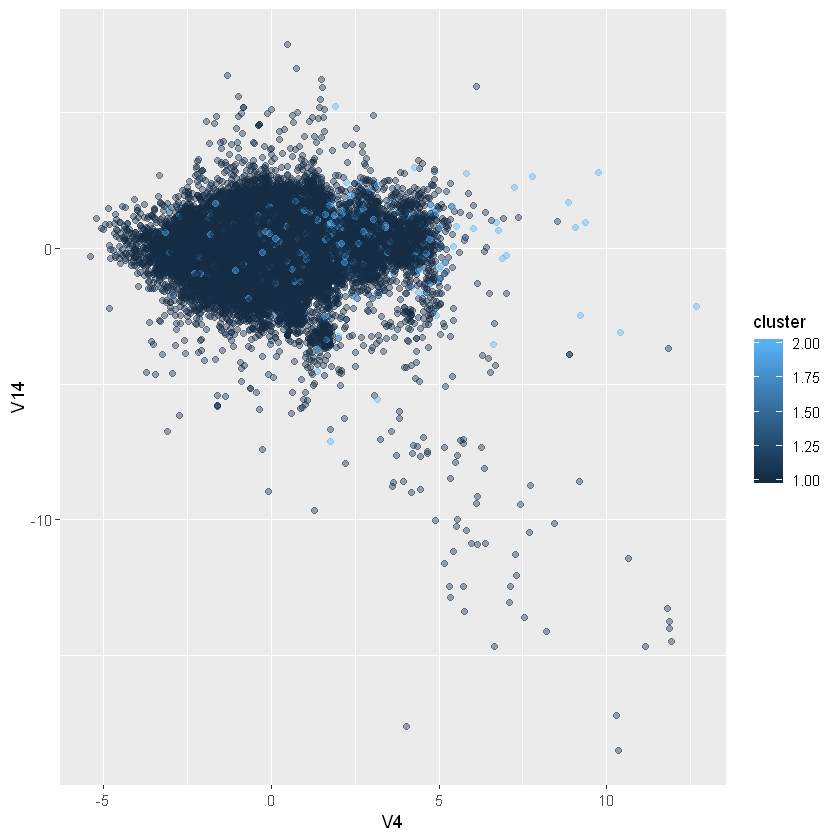

In [17]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V4, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V14")

**> Selected Subset**

In [18]:
# Compute k-means with k = 2
set.seed(567)
resultK2sub <- kmeans(XTrainSub, 2, iter.max = 15, nstart = 50)

In [19]:
# Cluster size
resultK2sub$size

[1] 22492 23076

In [20]:
table(resultK2sub$cluster, yTrainSub$Class)

   
        1     2
  1     2 22490
  2    80 22996

In [21]:
# Add the cluster classifications to the original data
clustDfSub <- cbind(XTrainSub, cluster = resultK2sub$cluster)
head(clustDfSub, 2)

V4,V10,V12,V14,V17,cluster
-2.3710149,-0.3395744,-0.8130265,-1.1791100,0.5734176,1
-0.7282708,-1.0898177,0.9220560,-0.2163698,-0.1641099,1


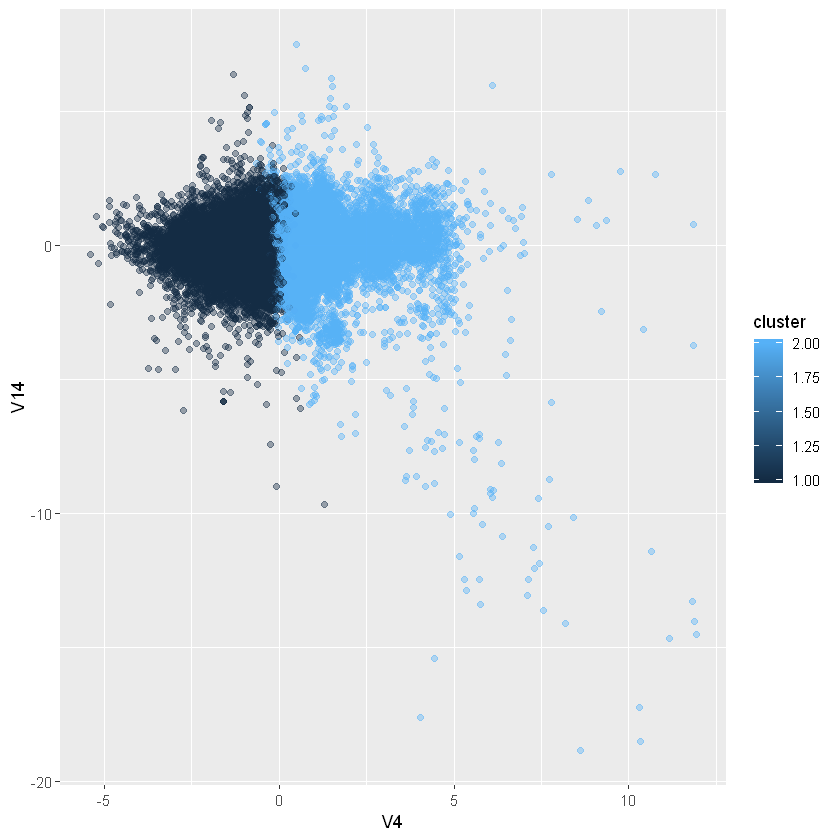

In [22]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDfSub, aes(x = V4, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V14")

## Compare with Supervised Model

### Data for classification model and predictions; to compare with kmeans predictions

**Change the cluster labels from 1 and 2 to 1 and 0 to match the Class labels from original dataframe.**

**> Full Normal Dataset**

In [23]:
# change the cluster labels from 1 and 2 to 1 and 0 to match the Class labels from original dataframe

#replicate the dataframe
kmeanDf <- clustDf

# replace the label values back to original 0 and 1
kmeanDf[kmeanDf == 1] <- 1
kmeanDf[kmeanDf == 2] <- 0

In [24]:
# drop the target variable
XkmeanDf <- kmeanDf[, c(1:27)]
ykmeanDf <- subset(kmeanDf, select=c("cluster"))



**> Selected Subset**

In [25]:
# change the cluster labels from 1 and 2 to 1 and 0 to match the Class labels from original dataframe

#replicate the dataframe
kmeanDfSub <- clustDfSub

# replace the label values back to original 0 and 1
kmeanDfSub[kmeanDfSub == 1] <- 1
kmeanDfSub[kmeanDfSub == 2] <- 0

In [26]:
# drop the target variable
XkmeanDfSub <- kmeanDfSub[, c(1:5)]
ykmeanDfSub <- subset(kmeanDfSub, select=c("cluster"))

**Supervised Classification DataSet**

In [85]:
# import full dataset to be underbalanced
underDf <- read.csv('creditcard.csv')

In [86]:
head(underDf, 3)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


In [87]:
dim(underDf)

[1] 284807     31

**> Full Dataset**

In [88]:
# dataframe with original labels
dfClass <- underDf[, c(3:24, 26:31)]
head(underDf, 3)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


In [130]:
dim(dfClass)

[1] 284807     28

**> Selected Subset**

In [89]:
dfSubClass <- underDf[, c(5:5, 11:11, 13:13, 15:15, 18:18, 31:31)]
head(dfSubClass, 2)

V4,V10,V12,V14,V17,Class
1.3781552,0.09079417,-0.6178009,-0.3111694,0.2079712,0
0.4481541,-0.16697441,1.0652353,-0.1437723,-0.1148047,0


**Split the Data into Training and Test Data**

**> Full Normal Data**

In [90]:
set.seed(102) 
sample3 = sample.split(dfClass$Amount, SplitRatio = .80)
TrainClass = subset(dfClass, sample3 == TRUE)
TestClass  = subset(dfClass, sample3 == FALSE)


In [131]:
dim(TestClass)

[1] 52892    28

**> Select Subset**

In [91]:
set.seed(103) 
sample4 = sample.split(dfSubClass$V4, SplitRatio = .80)
TrainClassSub = subset(dfSubClass, sample4 == TRUE)
TestClassSub  = subset(dfSubClass, sample4 == FALSE)


**Undersampling Training Data Only**

**> Full Normal Dataset**

In [93]:
table(TrainClass$Class)


     0      1 
231496    419 

In [94]:
# Random Under-Sampling (RUS)

# set the number of non-fraud records to under sample to
n_fraud <- 419
new_frac_fraud <- 0.50
new_n_total <- n_fraud/new_frac_fraud

undersampling_result <- ovun.sample(Class ~ .,
                                   data = TrainClass,
                                   method = "under",
                                   N = new_n_total,
                                   seed =123)

TrainClass <- undersampling_result$data

table(TrainClass$Class)


  0   1 
419 419 

In [95]:
dim(TrainClass)

[1] 838  28

**> Select Feature Subset**

In [92]:
table(TrainClassSub$Class)


     0      1 
227453    392 

In [96]:
# Random Under-Sampling (RUS)

# set the number of non-fraud records to under sample to
n_fraud <- 392
new_frac_fraud <- 0.50
new_n_total <- n_fraud/new_frac_fraud

undersampling_result <- ovun.sample(Class ~ .,
                                   data = TrainClassSub,
                                   method = "under",
                                   N = new_n_total,
                                   seed =123)

TrainClassSub <- undersampling_result$data

table(TrainClassSub$Class)


  0   1 
392 392 

In [97]:
dim(TrainClassSub)

[1] 784   6

**Separate Predictor Features and Target Feature**

**> Full Normal Dataset**

In [98]:
# drop the target variable
XTrainClass <- TrainClass[, c(1:27)]
yTrainClass <- subset(TrainClass, select=c("Class"))

XTestClass <- TestClass[, c(1:27)]
yTestClass <- subset(TestClass, select=c("Class"))

**> Select Feature Subset**

In [99]:
# drop the target variable
yTrainClassSub <- subset(TrainClassSub, select=c("Class"))
yTestClassSub <- subset(TestClassSub, select=c("Class"))
XTrainClassSub <- TrainClassSub[, c(1:5)]
XTestClassSub <- TestClassSub[, c(1:5)]

### Modeling

**> Full Normal Dataset**

In [35]:
# LR model with the kmeans cluster result as the target variable
lrModelK2 <- glm(cluster ~ ., data = kmeanDf, family = binomial(), maxit = 100)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [100]:
# LR model with original class labels as the target variable
lrModelOrig <- glm(Class ~ ., data = TrainClass, family = binomial(), maxit = 100)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

**> Selected Subset**

In [39]:
# LR model with the kmeans cluster result as the target variable
lrModelK2Sub <- glm(cluster ~ ., data = kmeanDfSub, family = binomial(), maxit = 100)



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [102]:
# LR model with original class labels as the target variable
lrModelOrigSub <- glm(Class ~ ., data = TrainClassSub, family = binomial(), maxit = 100)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

### Predictions

**> Full Normal Data**

In [42]:
# predictions on training data

# make predictions on kmeans clusters as target variable
predLRk2 <- predict(lrModelK2, XkmeanDf)



In [105]:
# make predictions on original target labels
predLROrig <- predict(lrModelOrig, XTrainClass)


**> Selected Subset**

In [44]:
# predictions on training data

# make predictions on kmeans clusters as target variable
predLRk2Sub <- predict(lrModelK2Sub, XkmeanDfSub)


In [107]:
# make predictions on original target labels
predLROrigSub <- predict(lrModelOrigSub, XTrainClassSub)

In [108]:

predLRk2 <- as.numeric(as.character(predLRk2))

predLROrig <- as.numeric(as.character(predLROrig))

predLRk2Sub <- as.numeric(as.character(predLRk2Sub))

predLROrigSub <- as.numeric(as.character(predLROrigSub))

### Evaluate Training Models

**> Full Normal Dataset**

**Confusion Matrix**

In [47]:
# https://www.journaldev.com/47628/f1-score-in-r

#error metrics -- Confusion Matrix
err_metric=function(CM)
{
  TN =CM[1,1]
  TP =CM[2,2]
  FP =CM[1,2]
  FN =CM[2,1]
  precision =(TP)/(TP+FP)
  recall_score =(TP)/(TP+FN)
 
  f1_score=2*((precision*recall_score)/(precision+recall_score))
  accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
  False_positive_rate =(FP)/(FP+TN)
  False_negative_rate =(FN)/(FN+TP)
 
  print(paste("Precision value of the model: ",round(precision,2)))
  print(paste("Accuracy of the model: ",round(accuracy_model,2)))
  print(paste("Recall value of the model: ",round(recall_score,2)))
  print(paste("False Positive rate of the model: ",round(False_positive_rate,2)))
 
  print(paste("False Negative rate of the model: ",round(False_negative_rate,2)))
 
  print(paste("f1 score of the model: ",round(f1_score,2)))
}



In [48]:
# make confusion matrix with kmean clusters as target label
predLRk2 <- ifelse(predLRk2 > 0.5,1,0) # Probability check
CM= table(ykmeanDf$cluster, predLRk2)
print(CM)
err_metric(CM)

   predLRk2
        0     1
  0  1199    26
  1    28 46423
[1] "Precision value of the model:  1"
[1] "Accuracy of the model:  1"
[1] "Recall value of the model:  1"
[1] "False Positive rate of the model:  0.02"
[1] "False Negative rate of the model:  0"
[1] "f1 score of the model:  1"


In [49]:
F1_Score(y_pred =predLRk2, y_true = ykmeanDf$cluster, positive = "1")
Recall(y_pred = predLRk2, y_true = ykmeanDf$cluster, positive = "1")

[1] 0.9994187

[1] 0.9993972

In [109]:
# make confusion matrix with kmean clusters as target label
predLROrig <- ifelse(predLROrig > 0.5,1,0) # Probability check
CM= table(yTrainClass$Class, predLROrig)
print(CM)
err_metric(CM)

   predLROrig
      0   1
  0 413   6
  1  33 386
[1] "Precision value of the model:  0.98"
[1] "Accuracy of the model:  0.95"
[1] "Recall value of the model:  0.92"
[1] "False Positive rate of the model:  0.01"
[1] "False Negative rate of the model:  0.08"
[1] "f1 score of the model:  0.95"


In [110]:
F1_Score(y_pred = predLROrig, y_true = yTrainClass$Class, positive = "1")
Recall(y_pred = predLROrig, y_true = yTrainClass$Class, positive = "1")

[1] 0.9519112

[1] 0.9212411

**> Select Subset**

In [58]:
# make confusion matrix with kmean clusters as target label
predLRk2Sub <- ifelse(predLRk2Sub > 0.5,1,0) # Probability check
CM= table(ykmeanDfSub$cluster, predLRk2Sub)
print(CM)
err_metric(CM)

   predLRk2Sub
        0     1
  0 23076     0
  1     0 22492
[1] "Precision value of the model:  1"
[1] "Accuracy of the model:  1"
[1] "Recall value of the model:  1"
[1] "False Positive rate of the model:  0"
[1] "False Negative rate of the model:  0"
[1] "f1 score of the model:  1"


In [59]:
F1_Score(y_pred =predLRk2Sub, y_true = ykmeanDfSub$cluster, positive = "1")
Recall(y_pred = predLRk2Sub, y_true = ykmeanDfSub$cluster, positive = "1")

[1] 1

[1] 1

### Test Data

**Create Clusters for Full and Subset Test Datasets**

**> Full Normal Dataset**

[1]  460 8825

   
       1    2
  1    1  459
  2   27 8798

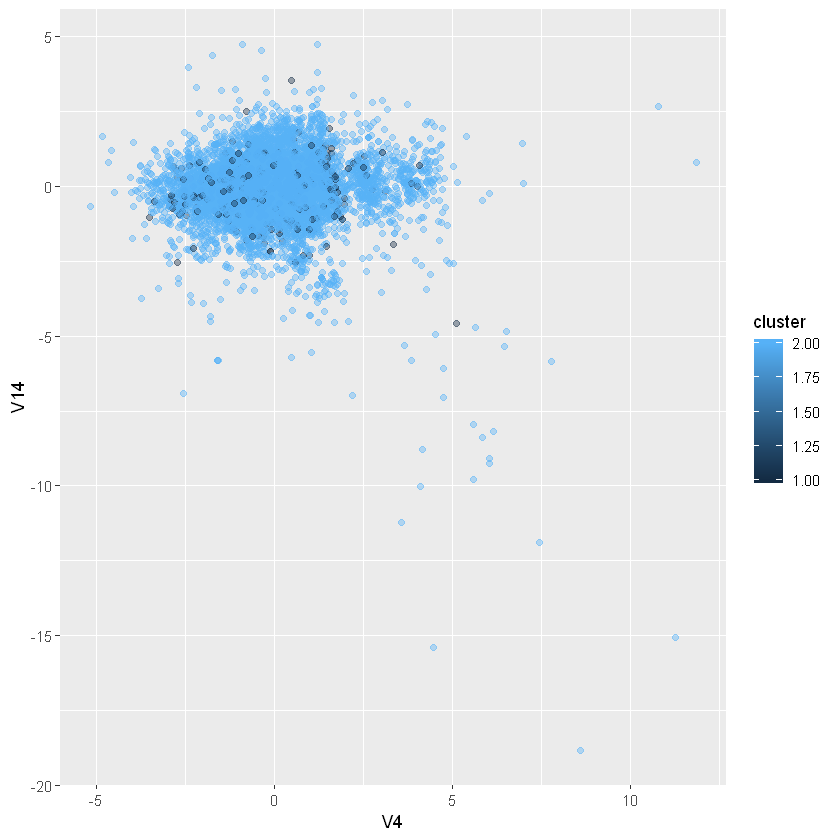

In [64]:
# Compute k-means with k = 2
set.seed(567)
resultK2Test <- kmeans(XTest, 2, iter.max = 15, nstart = 50)
# Cluster size
resultK2Test$size
table(resultK2Test$cluster, yTest$Class)
# Add the cluster classifications to the original data
clustDfTest <- cbind(XTest, cluster = resultK2Test$cluster)

# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDfTest, aes(x = V4, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V14")


**> Select Subset**

[1] 5818 5575

   
       1    2
  1   23 5795
  2    0 5575

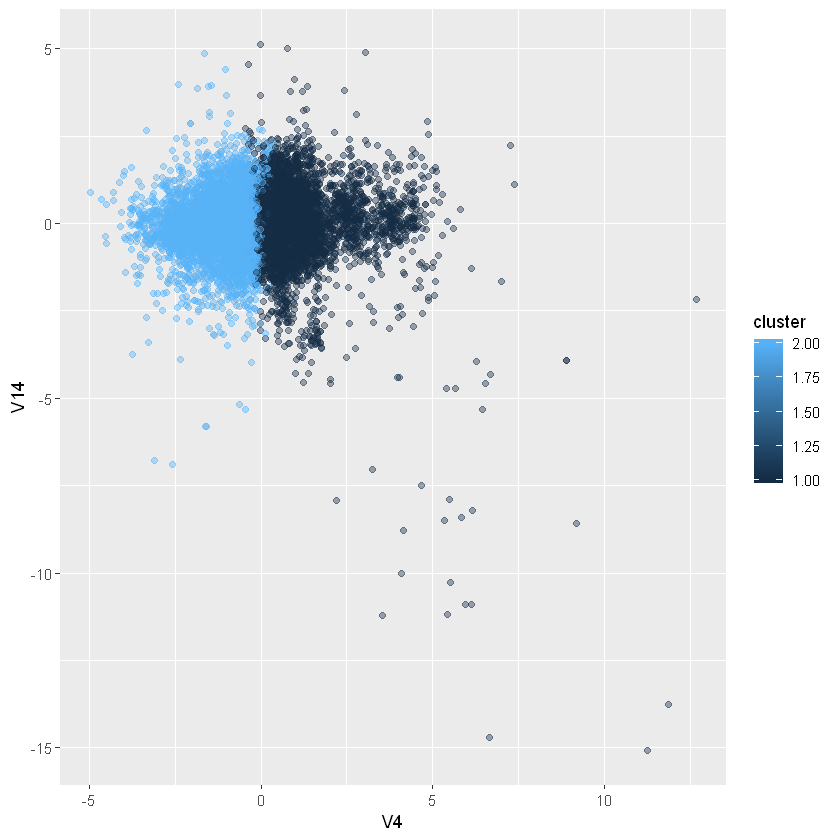

In [65]:
# Compute k-means with k = 2
set.seed(567)
resultK2TestSub <- kmeans(XTestSub, 2, iter.max = 15, nstart = 50)
# Cluster size
resultK2TestSub$size
table(resultK2TestSub$cluster, yTestSub$Class)
# Add the cluster classifications to the original data
clustDfTestSub <- cbind(XTestSub, cluster = resultK2TestSub$cluster)

# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDfTestSub, aes(x = V4, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V14")

**Data Preparation**

In [66]:
# Full Normal Dataset: change the cluster labels from 1 and 2 to 1 and 0 to match the Class labels from original dataframe
#replicate the dataframe
kmeanDfTest <- clustDfTest

# replace the label values back to original 0 and 1
kmeanDfTest[kmeanDfTest == 1] <- 1
kmeanDfTest[kmeanDfTest == 2] <- 0

# drop the target variable
XkmeanDfTest <- kmeanDfTest[, c(1:27)]
ykmeanDfTest <- subset(kmeanDfTest, select=c("cluster"))

# Select Subset: change the cluster labels from 1 and 2 to 1 and 0 to match the Class labels from original dataframe

#replicate the dataframe
kmeanDfTestSub <- clustDfTestSub

# replace the label values back to original 0 and 1
kmeanDfTestSub[kmeanDfTestSub == 1] <- 1
kmeanDfTestSub[kmeanDfTestSub == 2] <- 0

# drop the target variable
XkmeanDfTestSub <- kmeanDfTestSub[, c(1:5)]
ykmeanDfTestSub <- subset(kmeanDfTestSub, select=c("cluster"))

### Predictions

In [117]:
# Full Normal Dataset

# make predictions on kmeans clusters as target variable
predLRk2Test <- predict(lrModelK2, XkmeanDfTest)

# make predictions on original target labels
predLROrigTest <- predict(lrModelOrig, XTestClass)


# Select Subset

# make predictions on kmeans clusters as target variable
predLRk2TestSub <- predict(lrModelK2Sub, XkmeanDfTestSub)

# make predictions on original target labels
predLROrigTestSub <- predict(lrModelOrigSub, XTestClassSub)

In [118]:

predLRk2Test <- as.numeric(as.character(predLRk2Test))

predLROrigTest <- as.numeric(as.character(predLROrigTest))


predLRk2TestSub <- as.numeric(as.character(predLRk2TestSub))

predLROrigTestSub <- as.numeric(as.character(predLROrigTestSub))

In [73]:
# make confusion matrix with kmean clusters as target label
predLRk2Test <- ifelse(predLRk2Test > 0.5,1,0) # Probability check
CM= table(ykmeanDfTest$cluster, predLRk2Test)
print(CM)
err_metric(CM)


   predLRk2Test
       0    1
  0    0 8825
  1   19  441
[1] "Precision value of the model:  0.05"
[1] "Accuracy of the model:  0.05"
[1] "Recall value of the model:  0.96"
[1] "False Positive rate of the model:  1"
[1] "False Negative rate of the model:  0.04"
[1] "f1 score of the model:  0.09"


In [74]:
F1_Score(y_pred = predLRk2Test, y_true = ykmeanDfTest$cluster, positive = "1")
Recall(y_pred = predLRk2Test, y_true = ykmeanDfTest$cluster, positive = "1")

[1] 0.09068476

[1] 0.9586957

In [121]:
# make confusion matrix with  original labels as target label
predLROrigTest <- ifelse(predLROrigTest > 0.5,1,0) # Probability check
CM= table(yTestClass$Class, predLROrigTest)
print(CM)
err_metric(CM)

   predLROrigTest
        0     1
  0 51771  1048
  1     7    66
[1] "Precision value of the model:  0.06"
[1] "Accuracy of the model:  0.98"
[1] "Recall value of the model:  0.9"
[1] "False Positive rate of the model:  0.02"
[1] "False Negative rate of the model:  0.1"
[1] "f1 score of the model:  0.11"


In [122]:
F1_Score(y_pred = predLROrigTest, y_true = yTestClass$Class, positive = "1")
Recall(y_pred = predLROrigTest, y_true = yTestClass$Class, positive = "1")

[1] 0.1112047

[1] 0.9041096

In [81]:
# make confusion matrix with kmean clusters as target label
predLRk2TestSub <- ifelse(predLRk2TestSub > 0.5,1,0) # Probability check
CM= table(ykmeanDfTestSub$cluster, predLRk2TestSub)
print(CM)
err_metric(CM)

   predLRk2TestSub
       0    1
  0   11 5564
  1 5753   65
[1] "Precision value of the model:  0.01"
[1] "Accuracy of the model:  0.01"
[1] "Recall value of the model:  0.01"
[1] "False Positive rate of the model:  1"
[1] "False Negative rate of the model:  0.99"
[1] "f1 score of the model:  0.01"


In [82]:
F1_Score(y_pred =predLRk2TestSub, y_true = ykmeanDfTestSub$cluster, positive = "1")
Recall(y_pred = predLRk2TestSub, y_true = ykmeanDfTestSub$cluster, positive = "1")

[1] 0.01135669

[1] 0.01117222

In [125]:
# make confusion matrix with original labels as target label
predLROrigTestSub <- ifelse(predLROrigTestSub > 0.5,1,0) # Probability check
CM= table(yTestClassSub$Class, predLROrigTestSub)
print(CM)
err_metric(CM)

   predLROrigTestSub
        0     1
  0 56037   825
  1    16    84
[1] "Precision value of the model:  0.09"
[1] "Accuracy of the model:  0.99"
[1] "Recall value of the model:  0.84"
[1] "False Positive rate of the model:  0.01"
[1] "False Negative rate of the model:  0.16"
[1] "f1 score of the model:  0.17"


In [126]:
F1_Score(y_pred = predLROrigTestSub, y_true = yTestClassSub$Class, positive = "1")
Recall(y_pred = predLROrigTestSub, y_true = yTestClassSub$Class, positive = "1")


[1] 0.1665015

[1] 0.84